In [1]:
import pandas as pd
import glob 

In [2]:
paths = glob.glob("D:/rfiles/feature_matrix/feature_matrix_time_1024*.csv")
print(paths)

['D:/rfiles/feature_matrix\\feature_matrix_time_1024_ball.csv', 'D:/rfiles/feature_matrix\\feature_matrix_time_1024_inner.csv', 'D:/rfiles/feature_matrix\\feature_matrix_time_1024_outer_6.csv']


In [3]:
df1 = pd.read_csv(paths[0])
df1.loc[1657:,'fault_type'] = "ball"
# df1['fault_type'].value_counts()
df2 = pd.read_csv(paths[1])
df2.loc[1657:,'fault_type'] = 'inner'
data_all = df1.append(df2[1657:], ignore_index = True)
df3 = pd.read_csv(paths[2])
df3.loc[1657:,'fault_type'] = 'outer'
data_all = data_all.append(df3[1657:], ignore_index = True)
del [df1, df2, df3]
data_all['fault_type'].value_counts()

ball      1894
inner     1893
Normal    1657
outer     1425
Name: fault_type, dtype: int64

In [4]:
import numpy as np
from numpy.random import choice 
np.random.seed(1)
index = np.array([choice(np.arange(0,1657),1400,replace = False),
                choice(np.arange(1657,3551),1400,replace = False),
                choice(np.arange(3551,5444),1400,replace = False),
                choice(np.arange(5444,6869),1400,replace = False)])
index = index.ravel()
data = data_all.iloc[index,]
data = data.reset_index(drop = True)
test_index = np.array([choice(np.arange(0,1400),400, replace = False),
                     choice(np.arange(1400,2*1400),400, replace = False),
                     choice(np.arange(2*1400,3*1400),400, replace = False),
                     choice(np.arange(3*1400,4*1400),400, replace = False)])

test_index = test_index.ravel()
test_data = data.iloc[test_index,]
train_data = data.drop(data.index[test_index])

# Shuffle data
train_data = train_data.sample(frac = 1, random_state = 2)
test_data = test_data.sample(frac = 1, random_state = 3)

# Convert categorical lables to numberic entries

category_labels = ['Normal', 'ball', 'inner','outer']
# test_labels = test_data['fault_type']
test_labels = pd.Categorical(test_data['fault_type'],categories= category_labels).codes # Produces ndarrays
# train_labels = train_data['fault_type']
train_labels = pd.Categorical(train_data['fault_type'], categories = category_labels).codes

In [5]:
print(data.shape,test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(5600, 10) (1600, 10) (4000, 10) (1600,) (4000,)


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import sklearn
from sklearn import preprocessing

In [7]:
# Convert labels to categorical data
train_data = train_data.iloc[:,0:9]
test_data = test_data.iloc[:,0:9]
# Scale the data
train_data = preprocessing.scale(train_data)
test_data = preprocessing.scale(test_data)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

(4000, 9) (1600, 9) (4000, 4) (1600, 4)


In [18]:
model = Sequential([
    layers.Dense(5,activation = 'relu', input_dim = 9),
#     layers.Dropout(0.2),
    layers.Dense(5,activation = 'relu'),
    layers.Dense(5,activation = 'relu'),
    layers.Dense(4,activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 24        
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
callbacks = [EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)]

In [21]:
history = model.fit(train_data,train_labels,epochs = 100, validation_split = 0.2, verbose = 2, callbacks = callbacks)

Train on 3200 samples, validate on 800 samples
Epoch 1/100
3200/3200 - 0s - loss: 1.3068 - accuracy: 0.3659 - val_loss: 1.2674 - val_accuracy: 0.4825
Epoch 2/100
3200/3200 - 0s - loss: 1.1949 - accuracy: 0.5400 - val_loss: 1.1282 - val_accuracy: 0.5975
Epoch 3/100
3200/3200 - 0s - loss: 1.0283 - accuracy: 0.6338 - val_loss: 0.9524 - val_accuracy: 0.6812
Epoch 4/100
3200/3200 - 0s - loss: 0.8911 - accuracy: 0.7047 - val_loss: 0.8455 - val_accuracy: 0.7063
Epoch 5/100
3200/3200 - 0s - loss: 0.8074 - accuracy: 0.7225 - val_loss: 0.7791 - val_accuracy: 0.7237
Epoch 6/100
3200/3200 - 0s - loss: 0.7485 - accuracy: 0.7294 - val_loss: 0.7321 - val_accuracy: 0.7387
Epoch 7/100
3200/3200 - 0s - loss: 0.7063 - accuracy: 0.7400 - val_loss: 0.7001 - val_accuracy: 0.7362
Epoch 8/100
3200/3200 - 0s - loss: 0.6739 - accuracy: 0.7475 - val_loss: 0.6679 - val_accuracy: 0.7513
Epoch 9/100
3200/3200 - 0s - loss: 0.6463 - accuracy: 0.7534 - val_loss: 0.6461 - val_accuracy: 0.7500
Epoch 10/100
3200/3200 - 0

Epoch 80/100
3200/3200 - 0s - loss: 0.0982 - accuracy: 0.9719 - val_loss: 0.1108 - val_accuracy: 0.9712
Epoch 81/100
3200/3200 - 0s - loss: 0.0987 - accuracy: 0.9697 - val_loss: 0.1098 - val_accuracy: 0.9688
Epoch 82/100
3200/3200 - 0s - loss: 0.0972 - accuracy: 0.9706 - val_loss: 0.1080 - val_accuracy: 0.9737
Epoch 83/100
3200/3200 - 0s - loss: 0.0996 - accuracy: 0.9694 - val_loss: 0.1108 - val_accuracy: 0.9675
Epoch 84/100
3200/3200 - 0s - loss: 0.0955 - accuracy: 0.9725 - val_loss: 0.1077 - val_accuracy: 0.9712
Epoch 85/100
3200/3200 - 0s - loss: 0.0937 - accuracy: 0.9722 - val_loss: 0.1077 - val_accuracy: 0.9712
Epoch 86/100
3200/3200 - 0s - loss: 0.0950 - accuracy: 0.9716 - val_loss: 0.1124 - val_accuracy: 0.9663
Epoch 87/100
3200/3200 - 0s - loss: 0.0922 - accuracy: 0.9728 - val_loss: 0.1049 - val_accuracy: 0.9712
Epoch 88/100
3200/3200 - 0s - loss: 0.0917 - accuracy: 0.9737 - val_loss: 0.1039 - val_accuracy: 0.9725
Epoch 89/100
3200/3200 - 0s - loss: 0.0911 - accuracy: 0.9722 - 

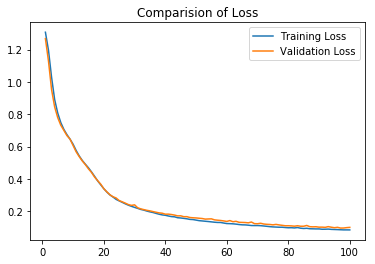

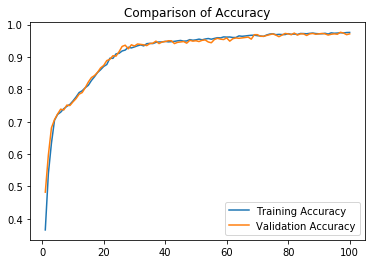

In [22]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = np.arange(1,len(train_loss)+1)

plt.figure()
plt.plot(epochs, train_loss, label = "Training Loss")
plt.plot(epochs, val_loss, label = "Validation Loss")
plt.legend()
plt.title("Comparision of Loss")
plt.show()

plt.figure()
plt.plot(epochs, train_acc, label = "Training Accuracy")
plt.plot(epochs, val_acc, label = "Validation Accuracy")
plt.title("Comparison of Accuracy")
plt.legend()
plt.show()

In [23]:
test_loss,test_acc = model.evaluate(test_data, test_labels)
print(test_acc)

1600/1600 [==============================] - 0s 31us/sample - loss: 0.2974 - accuracy: 0.9000
0.9


In [24]:
prediction = model.predict(test_data)
prediction_labels = list([])
for each_prediction in prediction:
    prediction_labels.append(list(each_prediction).index(max(each_prediction)))
    

In [25]:
from sklearn.metrics import confusion_matrix
true_labels = np.argmax(test_labels, axis = 1)
matrix = confusion_matrix(true_labels, prediction_labels)

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

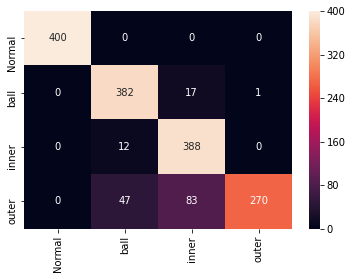

In [26]:
import seaborn as sns
matrix = pd.DataFrame(matrix)
sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = category_labels,
           yticklabels = category_labels)
plt.xticks(rotation = 90)